## Visualizing the PyTorch model

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/hw2
!ls -la

/content/drive/My Drive/Colab Notebooks/hw2
total 344370
-rw------- 1 root root    10244 Feb 22 05:00 ' (2).DS_Store'
-rw------- 1 root root   305814 Mar  4 01:24  Bad_Images_convnet.png
-rw------- 1 root root   301270 Mar  4 01:26  Bad_Images_mymodel.png
-rw------- 1 root root   315041 Mar  7 04:18  Bad_Images_resnet_2layer_B.png
-rw------- 1 root root   305548 Mar  7 03:47  Bad_Images_resnet_2layer.png
-rw------- 1 root root   309783 Mar  7 01:56  Bad_Images_resnet_conv_B.png
-rw------- 1 root root   309567 Mar  6 23:54  Bad_Images_resnet_softmax.png
-rw------- 1 root root   318730 Mar  4 00:59  Bad_Images_softmax.png
-rw------- 1 root root   313480 Mar  4 01:08  Bad_Images_twolayernn.png
-rw------- 1 root root     6557 Feb 22 05:00  cifar10.py
-rw------- 1 root root     6094 Feb 22 05:00  cifar10.pyc
-rw------- 1 root root    14479 Mar  3 19:00  convnet_gridfilt.png
-rw------- 1 root root   556337 Mar  4 01:24  convnet.log
-rw------- 1 root root    51012 Mar  3 19:07  convnet.png
-r

In [0]:
!chmod +x *.sh

In [0]:
# Assuming that you have completed training the classifer, let us plot the training loss vs. iteration. This is an
# example to show a simple way to log and plot data from PyTorch.

# we neeed matplotlib to plot the graphs for us!
import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Parse the train and val losses one line at a time.
import re
# regexes to find train and val losses on a line
float_regex = r'[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?'
train_loss_re = re.compile('.*Train Loss: ({})'.format(float_regex))
val_loss_re = re.compile('.*Val Loss: ({})'.format(float_regex))
val_acc_re = re.compile('.*Val Acc: ({})'.format(float_regex))
# extract one loss for each logged iteration
train_losses = []
val_losses = []
val_accs = []
# NOTE: You may need to change this file name.
with open('resnet_2layer_B.log', 'r') as f:
    for line in f:
        train_match = train_loss_re.match(line)
        val_match = val_loss_re.match(line)
        val_acc_match = val_acc_re.match(line)
        if train_match:
            train_losses.append(float(train_match.group(1)))
        if val_match:
            val_losses.append(float(val_match.group(1)))
        if val_acc_match:
            val_accs.append(float(val_acc_match.group(1)))

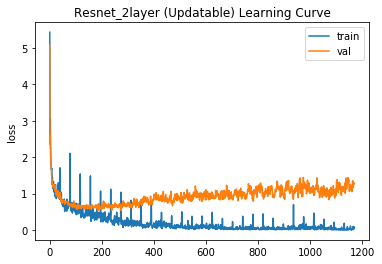

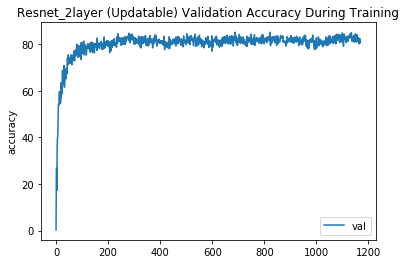

In [6]:
plt.figure()
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('Resnet_2layer (Updatable) Learning Curve')
plt.ylabel('loss')
plt.legend()

plt.figure()
plt.plot(val_accs, label='val')
plt.title('Resnet_2layer (Updatable) Validation Accuracy During Training')
plt.ylabel('accuracy')
plt.legend()